In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/kdugg/Downloads/msa_unemploy.txt', delimiter = '\t')

C:\Users\kdugg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns = [x.strip() for x in df.columns]

In [4]:
df = df.query('year >= 2000 and year<2020')

In [5]:
df = df.drop('footnote_codes', axis = 1)

In [6]:
df['key'] = df['series_id'].apply(lambda x:x[19])

In [7]:
df = df[df['series_id'].str.contains('LAUMT')]
df['series_id'] = df['series_id'].apply(lambda x: x[7:12])
df = df[~df['series_id'].str.contains('72850')]
df = df[~df['series_id'].str.contains('74500')]
df = df[~df['series_id'].str.contains('76900')]
df = df[~df['series_id'].str.contains('75550')]
df = df[~df['series_id'].str.contains('78700')]
df = df[~df['series_id'].str.contains('73050')]

In [8]:
df = df[df['period']!='M13']

In [9]:
df["DATE"] =  df['period'].apply(lambda x: x[1:]) + df['year'].astype(str)

In [10]:
df['DATE'] = df['DATE'].apply(lambda x: '{}/01/{}'.format(x[2:], x[0:2]))

In [11]:
df = df.drop('period', axis = 1).drop('year', axis = 1)

In [12]:
df = df.sort_values(['series_id','DATE', 'key'])

In [13]:
val = df['key']
thing = df.drop('key', axis = 1)
thing = pd.concat((thing, val), axis=1)

val = df['value']
thing = thing.drop('value', axis = 1)
thing = pd.concat((thing, val), axis=1)
df = thing

In [14]:
nectamap = {
    '70750' : '12620',
    '70900' : '12700',
    '71650' : '14460', 
    '71950' : '14860', 
    '72400' : '15540',
    '73450' : '25540', 
    '74650' : '30340',
    '74950' : '31700',
    '75700' : '35300',
    '76450' : '35980',
    '76600' : '38340',
    '76750' : '38860',
    '77200' : '39300',
    '78100' : '44140',
    '79600' : '49340'
}
for x in df['series_id']:
    if x[0] != '7':
        nectamap[x] = x

In [15]:
df['series_id'] = df['series_id'].map(nectamap)

In [16]:
vals = df['value'].to_numpy().astype('float')
index = pd.MultiIndex.from_frame(df.drop('value', axis = 1))
multi = pd.DataFrame(vals, index=index, columns=['value'])

In [17]:
multi

value
series_id DATE       key          
10180     2000/01/01 3         4.5
                     4      3410.0
                     5     72599.0
                     6     76009.0
          2000/01/02 3         4.5
...                            ...
49340     2019/01/11 6    365861.0
          2019/01/12 3         2.6
                     4      9640.0
                     5    356959.0
                     6    366599.0

[374400 rows x 1 columns]

In [17]:
unstacked = multi.unstack().reset_index()
unstacked.columns =  ['METROPOLITAN_STATISTICAL_AREA', 'DATE', 'UNEMPLOYMENT_RATE', 'UNEMPLOYMENT', 'EMPLOYMENT', 'LABOR_FORCE']
unstacked['DATE'] = unstacked['DATE'].apply(lambda x: '{}/01/{}'.format(x[-2:], x[0:4]))

In [18]:
unstacked.to_parquet('msa_unemploy.parquet')

C:\Users\kdugg\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


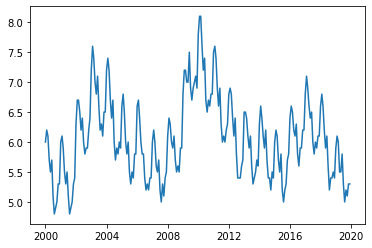

In [23]:
import matplotlib.pyplot as plt

one = unstacked[unstacked['METROPOLITAN_STATISTICAL_AREA']=='11260']
one['DATE'] = one['DATE'].astype('datetime64')
plt.plot(one['DATE'].to_numpy(), one['UNEMPLOYMENT_RATE'].to_numpy())
plt.show()